In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_q37b = pd.read_csv('C:/Users/Woon.Kim/Downloads/CG_in_US_2015_Public_Use_data_files/data.csv')
data_q37b = data_q37b[data_q37b['q37b'].notna()]
data_q37b = data_q37b[data_q37b.columns[data_q37b.isnull().mean() < 0.2]]

data_q37b.columns[data_q37b.isnull().any()]

for column in data_q37b.columns:
    data_q37b[column].fillna(data_q37b[column].mode()[0], inplace=True)

median = data_q37b.loc[data_q37b['agecr'] < 200, 'agecr'].median()
data_q37b["agecr"] = np.where(data_q37b["agecr"] > 200, median,data_q37b['agecr'])

# random forest
from sklearn.ensemble import RandomForestRegressor

x = data_q37b.loc[:, data_q37b.columns != 'q37b']
y = data_q37b['q37b']

#m = sqrt(p)+1 features
nfeatures = data_q37b.shape[1] - 1
model4 = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
model4.fit(x,y)

y_hat = model4.predict(x)

score = model4.score(x, y)

from sklearn.metrics import mean_squared_error
model4_train_rmse = mean_squared_error(y, y_hat, squared=False)

df_feature = pd.DataFrame(zip(x.columns, model4.feature_importances_), columns = ['feature','importance'])
df_feature = df_feature.sort_values(by=['importance'], ascending=False)
#plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])


df_feature[0:29]

feature  importance
97        q35    0.051908
98        q36    0.044227
113       n19    0.032470
38      agecr    0.027389
124        d2    0.027342
0          id    0.022833
26      agehh    0.022413
30      agecg    0.019798
11        sc2    0.019313
56        q18    0.017495
18     ageirx    0.017480
84      hours    0.017134
104     q34ct    0.016980
63     q21avg    0.015928
137  IND14WGT    0.015591
83        q25    0.015355
41         q7    0.015304
136   HH14WGT    0.015182
79      iadls    0.013812
130    income    0.013528
61        q21    0.013515
129      educ    0.012742
62       q21x    0.012077
123        d1    0.012072
99        q39    0.011890
95        q38    0.011197
107      q45a    0.011121
21     HHsize    0.010886
45      lives    0.010670

In [3]:
data_q37b = data_q37b[['q18', 'n19', 'agecr', 'agecg', 'hours', 'q34ct', 'q7', 'iadls', 'income', 'educ', 'q39', 'q38', 'q45a', 'HHsize', 'lives', 'q37b']]

In [4]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0]
data_q37b = data_q37b.loc[data_q37b['q18'].isin(lst)]
data_q37b["q18"] = data_q37b["q18"].astype(str)
data_q37b["q18"] = data_q37b["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0"], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones"])
                            
data_q37b

q18  n19  agecr  agecg  hours  q34ct    q7  iadls  income  \
3               Aging  3.0   87.0     58   28.0    2.0  13.0    4.0     2.0   
5     MobilityProblem  2.0   80.0     37    0.5    4.0   6.0    6.0     6.0   
13          Arthritis  1.0   71.0     38   77.0    1.0  26.0    5.0     2.0   
24             Cancer  1.0   89.0     64   12.0    0.0  13.0    6.0     6.0   
36           Diabetes  3.0   81.0     47   21.0    1.0  13.0    7.0     3.0   
...               ...  ...    ...    ...    ...    ...   ...    ...     ...   
7969           Stroke  5.0   86.0     54   90.0    1.0   6.0    7.0     5.0   
7970        Arthritis  3.0   89.0     65   20.0    0.0  13.0    6.0    10.0   
7971      BrokenBones  3.0   66.0     47   40.0    2.0  13.0    5.0     6.0   
7973        Alzheimer  2.0   92.0     64   77.0    0.0  13.0    7.0     4.0   
7974     HeartDisease  6.0   82.0     47   10.0    1.0  13.0    5.0     6.0   

      educ  q39  q38  q45a  HHsize  lives  q37b  
3      5.0  1.0  2.0   1.0       2    9.0   3.0  
5      6.0  2.0  7.0   2.0       2    4.0   1.0  
13     2.0  1.0  1.0   1.0       5    1.0   1.0  
24     5.0  1.0  2.0   2.0       2    1.0   1.0  
36     1.0  1.0  2.0   2.0       5    1.0   4.0  
...    ...  ...  ...   ...     ...    ...   ...  
7969   5.0  2.0  3.0   1.0       2    9.0   3.0  
7970   6.0  2.0  7.0   4.0       2    1.0   2.0  
7971   6.0  2.0  4.0   2.0       3    9.0   4.0  
7973   6.0  1.0  1.0   1.0       2    9.0   2.0  
7974   5.0  1.0  2.0   2.0       3    9.0   1.0  

[1267 rows x 16 columns]

In [5]:
lst2 = ['q39', 'q7', 'q45a', 'lives']
data_q37b[lst2] = data_q37b[lst2].astype(object)

In [6]:
data_q37b = data_q37b[data_q37b['n19'] != 7.0]
data_q37b = data_q37b[data_q37b['n19'] != 6.0]
data_q37b = data_q37b[data_q37b['q39'] != 3.0]
data_q37b = data_q37b[data_q37b['q39'] != 4.0]
data_q37b = data_q37b[data_q37b['q38'] != 5.0]
data_q37b = data_q37b[data_q37b['q38'] != 6.0] 

data_q37b = data_q37b[data_q37b['educ'] != 7.0] 
data_q37b = data_q37b[data_q37b['educ'] != 8.0] 

data_q37b = data_q37b[data_q37b['q45a'] != 3.0]
data_q37b = data_q37b[data_q37b['q45a'] != 4.0]

data_q37b = data_q37b[data_q37b['lives'] != 10.0]
data_q37b = data_q37b[data_q37b['lives'] != 11.0]


data_q37b = data_q37b[data_q37b['income'] != 7.0]
data_q37b = data_q37b[data_q37b['income'] != 8.0]
data_q37b = data_q37b[data_q37b['income'] != 9.0]
data_q37b = data_q37b[data_q37b['income'] != 10.0]


data_q37b = data_q37b[data_q37b['q37b'] != 6.0] 
data_q37b = data_q37b[data_q37b['q37b'] != 7.0] 

In [7]:
data_q37b["q39"] = data_q37b["q39"].astype(str)
data_q37b["q39"] = data_q37b["q39"].replace(["1.0","2.0"], ["Optional","Mandatory"])
data_q37b

q18  n19  agecr  agecg  hours  q34ct    q7  iadls  income  \
3               Aging  3.0   87.0     58   28.0    2.0  13.0    4.0     2.0   
5     MobilityProblem  2.0   80.0     37    0.5    4.0   6.0    6.0     6.0   
13          Arthritis  1.0   71.0     38   77.0    1.0  26.0    5.0     2.0   
24             Cancer  1.0   89.0     64   12.0    0.0  13.0    6.0     6.0   
36           Diabetes  3.0   81.0     47   21.0    1.0  13.0    7.0     3.0   
...               ...  ...    ...    ...    ...    ...   ...    ...     ...   
7967    MentalIllness  5.0   41.0     46    8.0    0.0  17.0    6.0     1.0   
7968        Alzheimer  4.0   75.0     46   25.0    4.0  13.0    6.0     6.0   
7969           Stroke  5.0   86.0     54   90.0    1.0   6.0    7.0     5.0   
7971      BrokenBones  3.0   66.0     47   40.0    2.0  13.0    5.0     6.0   
7973        Alzheimer  2.0   92.0     64   77.0    0.0  13.0    7.0     4.0   

      educ        q39  q38 q45a  HHsize lives  q37b  
3      5.0   Optional  2.0  1.0       2   9.0   3.0  
5      6.0  Mandatory  7.0  2.0       2   4.0   1.0  
13     2.0   Optional  1.0  1.0       5   1.0   1.0  
24     5.0   Optional  2.0  2.0       2   1.0   1.0  
36     1.0   Optional  2.0  2.0       5   1.0   4.0  
...    ...        ...  ...  ...     ...   ...   ...  
7967   4.0   Optional  2.0  1.0       4   9.0   5.0  
7968   6.0   Optional  3.0  2.0       4   9.0   5.0  
7969   5.0  Mandatory  3.0  1.0       2   9.0   3.0  
7971   6.0  Mandatory  4.0  2.0       3   9.0   4.0  
7973   6.0   Optional  1.0  1.0       2   9.0   2.0  

[1199 rows x 16 columns]

In [8]:
data_q37b.columns = ['illness', 'diff_aff_care', 'agecr', 'agecg', 'hours', 'count_work_impacts', 'relationship', 'iadls', 'income', 'educ', 'choice', 'coord_care', 'fin_help_req', 'HHsize', 'where_cr_lives', 'fin_strain']
data_q37b = data_q37b.reset_index(drop=True)

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_q37b, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Plots

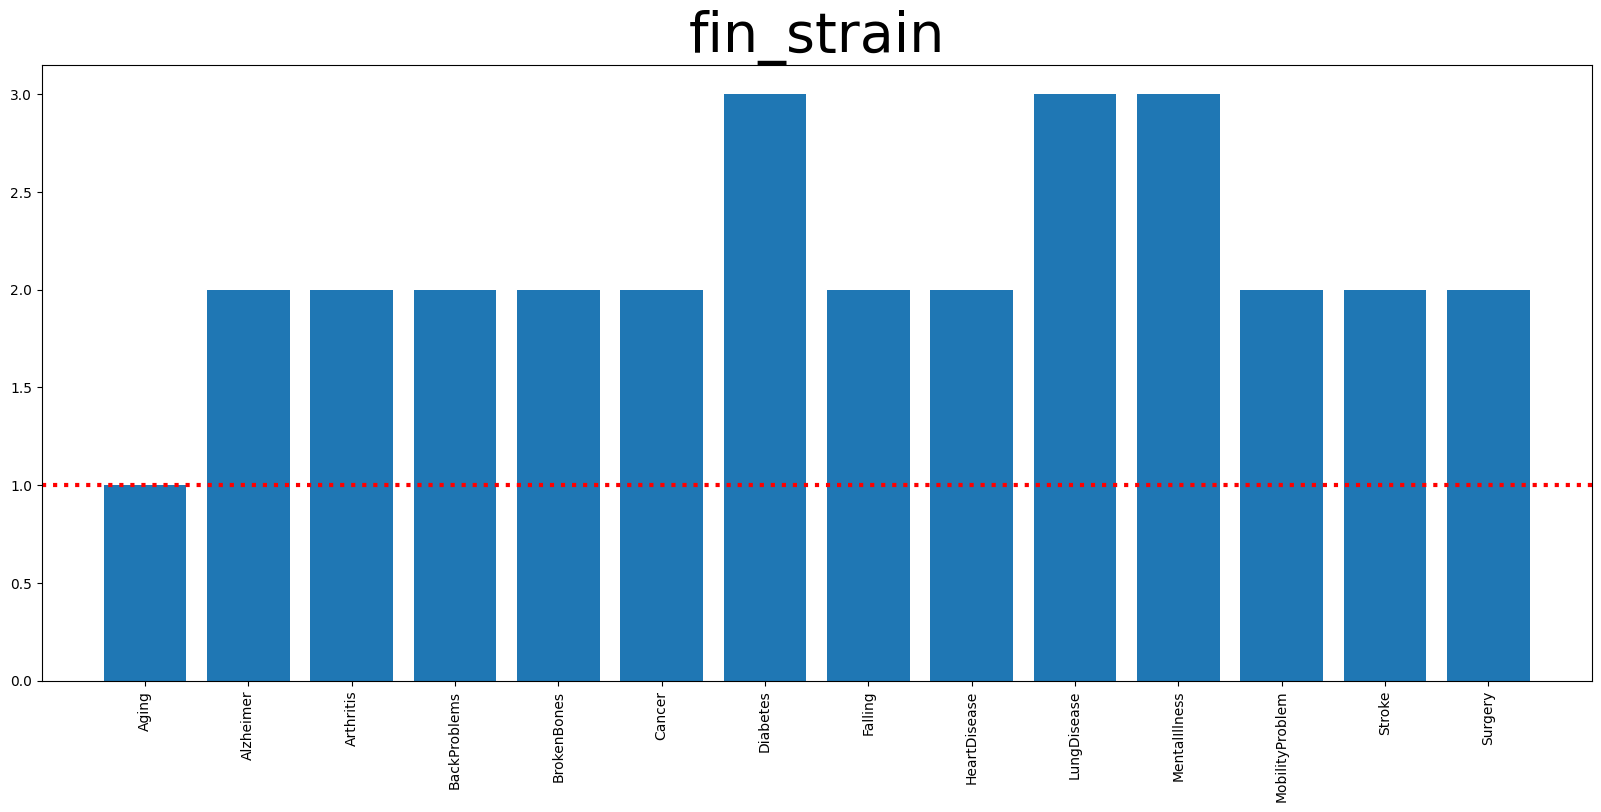

In [10]:
df_1 = data_q37b.groupby(['illness'])['fin_strain'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['fin_strain'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['fin_strain'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "fin_strain", fontsize=40)
plt.plot()
plt.show()

In [11]:
data_q37b.head()

illness  diff_aff_care  agecr  agecg  hours  count_work_impacts  \
0            Aging            3.0   87.0     58   28.0                 2.0   
1  MobilityProblem            2.0   80.0     37    0.5                 4.0   
2        Arthritis            1.0   71.0     38   77.0                 1.0   
3           Cancer            1.0   89.0     64   12.0                 0.0   
4         Diabetes            3.0   81.0     47   21.0                 1.0   

  relationship  iadls  income  educ     choice  coord_care fin_help_req  \
0         13.0    4.0     2.0   5.0   Optional         2.0          1.0   
1          6.0    6.0     6.0   6.0  Mandatory         7.0          2.0   
2         26.0    5.0     2.0   2.0   Optional         1.0          1.0   
3         13.0    6.0     6.0   5.0   Optional         2.0          2.0   
4         13.0    7.0     3.0   1.0   Optional         2.0          2.0   

   HHsize where_cr_lives  fin_strain  
0       2            9.0         3.0  
1       2            4.0         1.0  
2       5            1.0         1.0  
3       2            1.0         1.0  
4       5            1.0         4.0

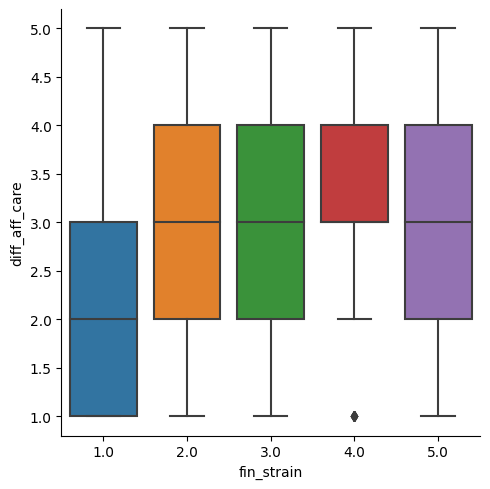

In [14]:
#sns.catplot(x="fin_strain", y="where_cr_lives", kind="box", data=data_q37b)
#sns.catplot(x="where_cr_lives", y="fin_strain", kind="box", data=data_q37b)
sns.catplot(x="fin_strain", y="diff_aff_care", kind="box", data=data_q37b)

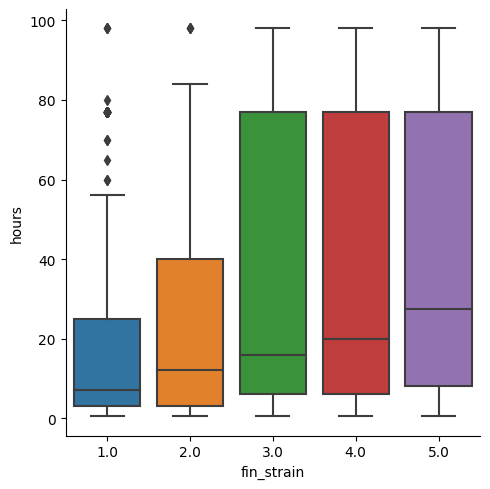

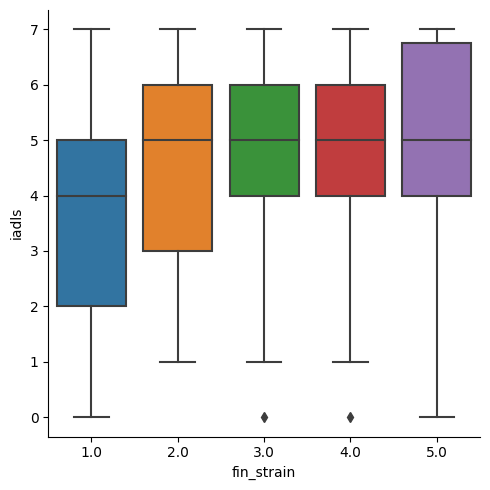

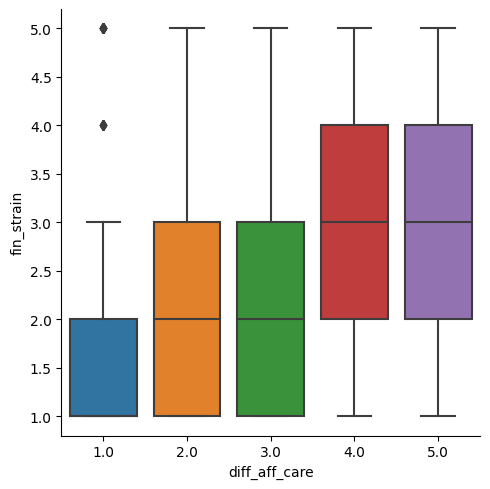

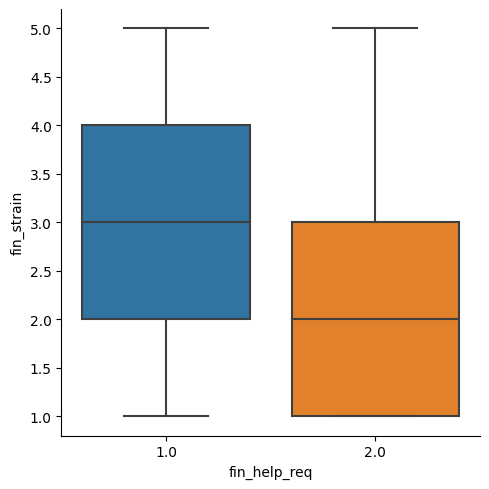

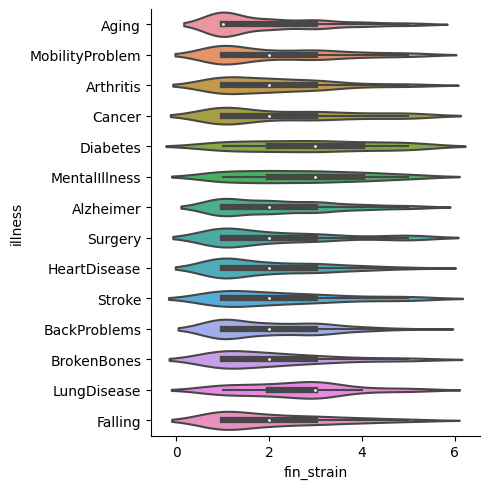

In [13]:
sns.catplot(x="fin_strain", y="hours", kind="box", data=data_q37b)

sns.catplot(x="fin_strain", y="iadls", kind="box", data=data_q37b)

sns.catplot(x="diff_aff_care", y="fin_strain", kind="box", data=data_q37b)

sns.catplot(x="fin_help_req", y="fin_strain", kind="box", data=data_q37b)

sns.catplot(x="fin_strain", y="illness",
            kind="violin", data=data_q37b)
